<a href="https://colab.research.google.com/github/zerryberry/C1/blob/master/Revised_EDA_mini_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
print('done')

done


In [3]:
df1= pd.read_csv('/content/fifa.csv') # /content/fifa.csv
#df2= pd.read_csv('/content/fifa_+variable_information.csv')
print(df1.shape)
#print(df2.shape)

(16987, 60)


## 1

In [4]:
df1.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94.0,94.0,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,Left,5.0,4.0,4.0,Medium/ Medium,Messi,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94.0,94.0,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92.0,93.0,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,Right,5.0,5.0,5.0,High/ Medium,Neymar,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91.0,93.0,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,Right,4.0,3.0,1.0,Medium/ Medium,Lean,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91.0,92.0,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,Right,4.0,5.0,4.0,High/ High,Normal,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [ ]:
df2.head()

,ID,unique id for every player
0,Name,name
1,Age,age
2,Photo,url to the player's photo
3,Nationality,nationality
4,Flag,url to players's country flag


In [5]:
# 2
df_n = pd.concat((df1.iloc[:,[0,1,2,4,6,7,8,10,11,12,13,14,15,16,18,22,25,26]], df1.iloc[:, 26:60]), axis=1)
df_n.shape

(16987, 52)

In [6]:
# 3 - Values
import re
df_n['Value'] = df_n['Value'].str.replace('€', '')

In [7]:
def clrm(n):
  if 'M' in n and '.' in n:
    return float(''.join(re.findall('\d+', n)))*100000
  elif 'M' in n and '.' not in n:
    return float(''.join(re.findall('\d+', n)))*1000000
  elif 'K' in n and '.' in n:
    return float(''.join(re.findall('\d+', n)))*100
  elif 'K' in n and '.' not in n:
    return float(''.join(re.findall('\d+', n)))*1000

In [12]:

df_n['Value']= df_n['Value'].apply(lambda x: clrm(x) if not isinstance(x, float) else x)

In [14]:
# Wage
df_n['Wage'] = df_n['Wage'].str.replace('€', '')
df_n['Wage'] = df_n['Wage'].apply(lambda x: clrm(x) if not isinstance(x, float) else x)

In [15]:
# We now know that we have date in this format as well 
print(max(df1['Joined'], key= lambda x: len(x) if not isinstance(x, float) else 0))

# lets see the head
df1['Joined'].head()

Jul 10, 2018


0     Jul 1, 2004
1    Jul 10, 2018
2     Aug 3, 2017
3     Jul 1, 2011
4    Aug 30, 2015
Name: Joined, dtype: object

In [16]:
df1['Joined'] = df1['Joined'].apply(lambda x: int(x.split(' ')[-1]) if not isinstance(x, float) else x)

In [17]:
# Sanity check with nan
df1['Joined'].isna().sum()

1520

In [18]:
# Contract valid until 

df_n['Contract Valid Until'].head()

0    2021
1    2022
2    2022
3    2020
4    2023
Name: Contract Valid Until, dtype: object

In [19]:
df_n['Contract Valid Until'] = pd.to_datetime(df1['Contract Valid Until'], errors='coerce')

In [20]:
# Height
df1['Height'].head()

0     5'7
1     6'2
2     5'9
3     6'4
4    5'11
Name: Height, dtype: object

In [21]:
df1['Height'].unique()

array(["5'7", "6'2", "5'9", "6'4", "5'11", "5'8", "6'0", "5'6", "5'10",
       "6'6", "6'1", "5'4", "6'3", "5'5", "6'5", "6'7", "5'3", "5'2",
       "6'8", "5'1", "6'9", nan], dtype=object)

In [22]:
df_n['Height']= df1['Height'].apply(lambda x: float('.'.join(x.split("'"))) if not isinstance(x, float) else x)

In [23]:
# Weight

df1['Weight'].head()

0    159lbs
1    183lbs
2    150lbs
3    168lbs
4    154lbs
Name: Weight, dtype: object

In [24]:
df_n['Weight'] = df1['Weight'].apply(lambda x: float(x[:-3]) if not isinstance(x, float) else x)

In [25]:
# Release clause

df_n['Release Clause'].head()

0    €226.5M
1    €127.1M
2    €228.1M
3    €138.6M
4    €196.4M
Name: Release Clause, dtype: object

In [26]:
df_n['Release Clause']= df_n['Release Clause'].apply(lambda x: clrm(x) if not isinstance(x, float) else x)

In [27]:
df_n['Release Clause'].isna().sum()

1527

In [28]:
# mean imputations

for i in df_n.select_dtypes(include='number'):
  df_n[i] = df_n[i].fillna(df_n[i].mean())

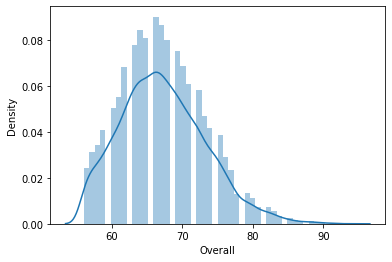

In [29]:
# overall ratings

sns.distplot(df1['Overall'])

In [30]:
df1['Overall'].skew()

0.4652309265060037

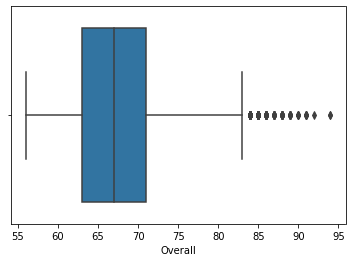

In [31]:
#1
sns.boxplot(df1['Overall'])

In [ ]:
# right skewed distribution
# most players are in 70-80 ratings
# few in 90-95 ratings

In [32]:
r= ['Overall', 'Value', 'Wage', 'International Reputation', 'Height', 'Weight', 'Release Clause']

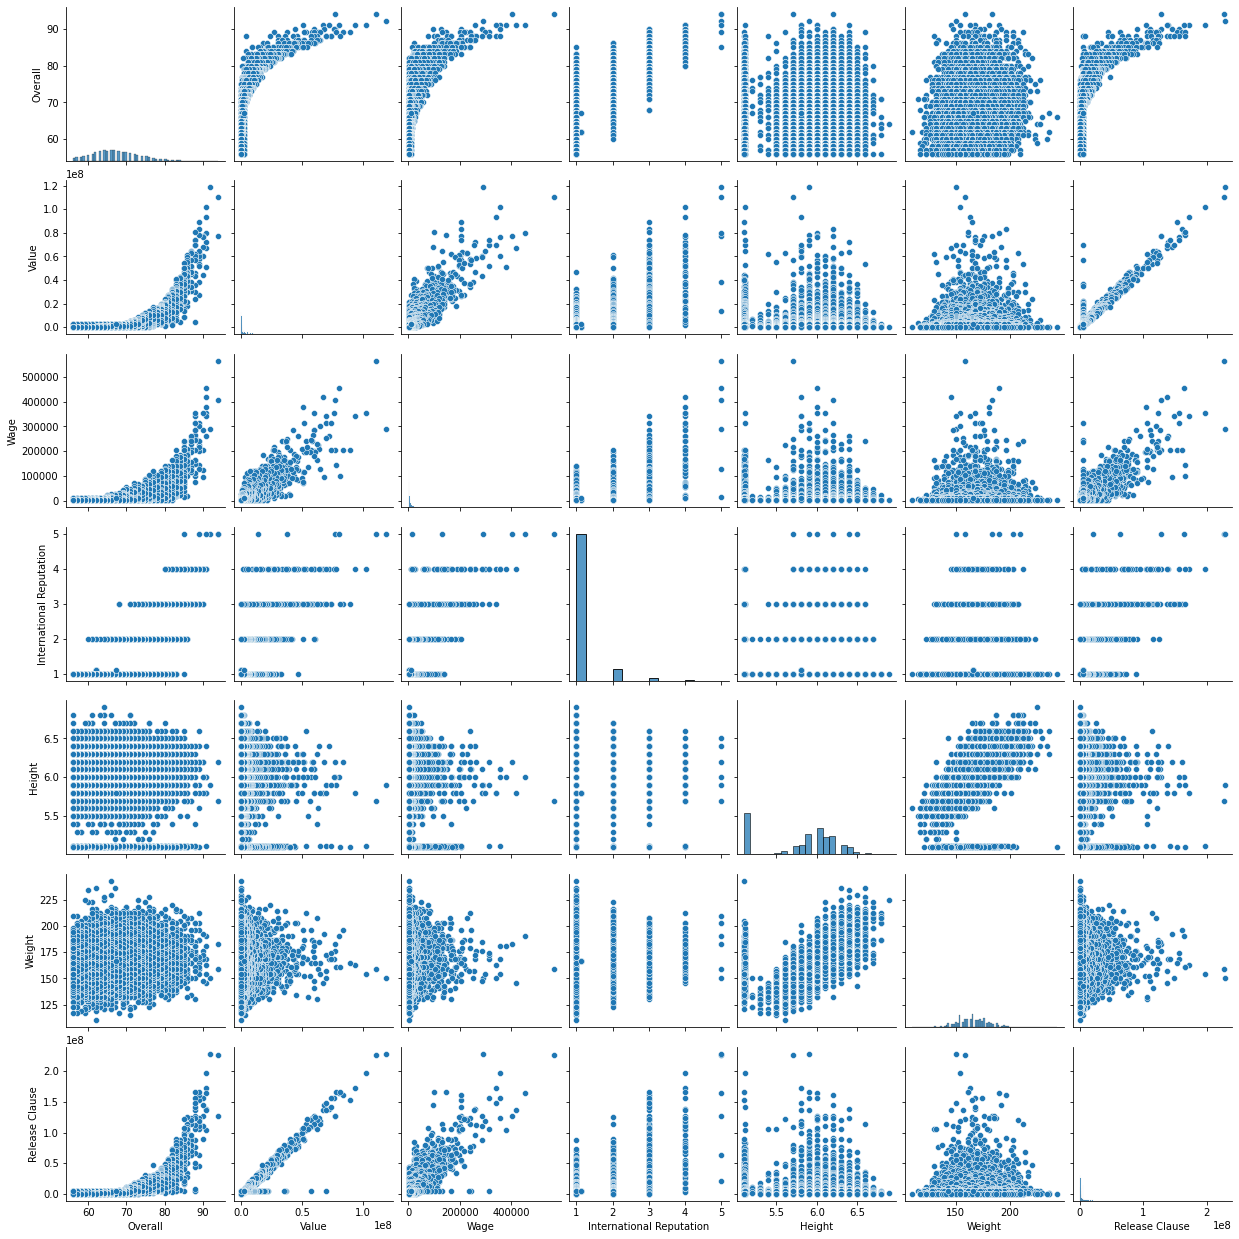

In [33]:
#2
sns.pairplot(df_n[r])

In [34]:
#3

av= df_n.loc[(df_n['Contract Valid Until'] == '2020-01-01T00:00:00.000000000')].sort_values(by='Overall', ascending=False)[:20]

In [35]:
av.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Contract Valid Until,Crossing,Finishing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Height,Weight
3,193080,De Gea,27,Spain,91.0,93.0,Manchester United,72000000.0,260000.0,Right,4.0,3.0,1.0,Medium/ Medium,GK,2020-01-01,17.0,13.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0,6.4,168.0
6,177003,L. Modrić,32,Croatia,91.0,91.0,Real Madrid,67000000.0,420000.0,Right,4.0,4.0,4.0,High/ High,RCM,2020-01-01,86.0,72.0,72.0,55.0,93.0,76.0,90.0,85.0,78.0,88.0,93.0,80.0,72.0,93.0,90.0,94.0,79.0,68.0,89.0,58.0,82.0,62.0,83.0,79.0,92.0,82.0,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,137400000.0,5.8,146.0
8,155862,Sergio Ramos,32,Spain,91.0,91.0,Real Madrid,51000000.0,380000.0,Right,4.0,3.0,3.0,High/ Medium,RCB,2020-01-01,66.0,60.0,60.0,91.0,78.0,66.0,63.0,74.0,72.0,77.0,84.0,76.0,75.0,78.0,85.0,66.0,79.0,93.0,84.0,83.0,59.0,88.0,90.0,60.0,63.0,75.0,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,104600000.0,6.0,181.0
5,183277,E. Hazard,27,Belgium,91.0,91.0,Chelsea,93000000.0,340000.0,Right,4.0,4.0,4.0,High/ Medium,LF,2020-01-01,81.0,84.0,84.0,61.0,89.0,80.0,95.0,83.0,79.0,83.0,94.0,94.0,88.0,95.0,90.0,94.0,82.0,56.0,83.0,66.0,80.0,54.0,41.0,87.0,89.0,86.0,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,172100000.0,5.8,163.0
13,168542,David Silva,32,Spain,90.0,90.0,Manchester City,60000000.0,285000.0,Left,4.0,2.0,4.0,High/ Medium,LCM,2020-01-01,84.0,76.0,76.0,54.0,93.0,82.0,89.0,82.0,77.0,87.0,94.0,70.0,64.0,92.0,90.0,90.0,72.0,64.0,78.0,52.0,75.0,57.0,50.0,89.0,92.0,75.0,93.0,59.0,53.0,29.0,6.0,15.0,7.0,6.0,12.0,111000000.0,5.8,148.0


In [36]:
#3 a
av['Wage'].mean()

205450.0

In [37]:
av['Age'].mean()

30.65

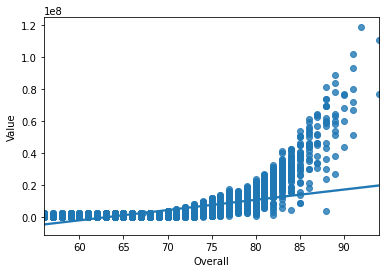

In [38]:
# C
sns.regplot(x='Overall', y='Value', data= df_n)

In [ ]:
# Yes there is a strong correlation between value and overall rating

In [39]:
#4

top_5 = {}
for i in df_n['Position'].unique():
  try:
    top_5[i]=list(df_n.sort_values(by=['Overall','Position'], ascending=[False, True]).groupby(df_n['Position']).get_group(i)[:5]['Name'].values)
  except KeyError:
    pass

In [40]:
len(top_5.keys())

27

In [41]:
len(df_n['Position'].unique())

28

In [ ]:
# We have one less value bcoz of one NaN

In [42]:
df_top_5 = pd.DataFrame(top_5)
df_top_5

,RF,ST,LW,GK,RCM,LF,RS,RCB,LCM,CB,LDM,CAM,CDM,LS,LCB,RM,LAM,LM,LB,RDM,RW,CM,RB,RAM,CF,RWB,LWB
0,L. Messi,Cristiano Ronaldo,Neymar Jr,De Gea,K. De Bruyne,E. Hazard,L. Suárez,Sergio Ramos,T. Kroos,D. Godín,N. Kanté,A. Griezmann,Sergio Busquets,E. Cavani,G. Chiellini,K. Mbappé,J. Rodríguez,P. Aubameyang,Marcelo,P. Pogba,Bernardo Silva,Thiago,Azpilicueta,J. Cuadrado,Luis Alberto,M. Ginter,N. Schulz
1,D. Mertens,R. Lewandowski,L. Insigne,J. Oblak,L. Modrić,P. Dybala,Z. Ibrahimović,Thiago Silva,David Silva,S. Umtiti,Paulinho,C. Eriksen,Casemiro,G. Higuaín,M. Hummels,M. Salah,D. Tadić,S. Mané,Jordi Alba,Illarramendi,R. Sterling,S. Milinković-Savić,Carvajal,H. Ziyech,S. Giovinco,P. Kadeřábek,Granell
2,D. Valeri,H. Kane,Isco,M. ter Stegen,I. Rakitić,Iniesta,Falcao,Piqué,M. Hamšík,M. Benatia,Marquinhos,Roberto Firmino,M. Pjanić,Diego Costa,K. Koulibaly,F. Thauvin,Fabrio Farinha,Douglas Costa,Alex Sandro,I. Gueye,Marco Asensio,Jorginho,K. Walker,Allan Bardinho,A. Milik,S. Coleman,Jonny
3,L. Podolski,S. Agüero,Coutinho,T. Courtois,J. Kimmich,Jonathan Viera,W. Ben Yedder,R. Varane,M. Verratti,N. Otamendi,Lucas Leiva,T. Müller,Fernandinho,A. Gómez,J. Vertonghen,José Callejón,Leo Caldeirinha,M. Reus,D. Alaba,D. De Rossi,R. Mahrez,I. Gündoğan,Sergi Roberto,Jacson Zonta,L. Stindl,D. Caligiuri,J. Hector
4,C. Ciano,G. Bale,L. Sané,M. Neuer,Saúl,S. Blanco,S. Zaza,L. Bonucci,Bruno Fernandes,Naldo,F. de Jong,M. Özil,Fabinho,Gerard Moreno,V. van Dijk,A. Di María,Nicolás Formido,Koke,Filipe Luís,M. Parolo,A. Sánchez,N. Keïta,L. Bender,Sebas Couteira,Raffael,Pablo Maffeo,J. Mojica


In [43]:
#4a

df_top_5

,RF,ST,LW,GK,RCM,LF,RS,RCB,LCM,CB,LDM,CAM,CDM,LS,LCB,RM,LAM,LM,LB,RDM,RW,CM,RB,RAM,CF,RWB,LWB
0,L. Messi,Cristiano Ronaldo,Neymar Jr,De Gea,K. De Bruyne,E. Hazard,L. Suárez,Sergio Ramos,T. Kroos,D. Godín,N. Kanté,A. Griezmann,Sergio Busquets,E. Cavani,G. Chiellini,K. Mbappé,J. Rodríguez,P. Aubameyang,Marcelo,P. Pogba,Bernardo Silva,Thiago,Azpilicueta,J. Cuadrado,Luis Alberto,M. Ginter,N. Schulz
1,D. Mertens,R. Lewandowski,L. Insigne,J. Oblak,L. Modrić,P. Dybala,Z. Ibrahimović,Thiago Silva,David Silva,S. Umtiti,Paulinho,C. Eriksen,Casemiro,G. Higuaín,M. Hummels,M. Salah,D. Tadić,S. Mané,Jordi Alba,Illarramendi,R. Sterling,S. Milinković-Savić,Carvajal,H. Ziyech,S. Giovinco,P. Kadeřábek,Granell
2,D. Valeri,H. Kane,Isco,M. ter Stegen,I. Rakitić,Iniesta,Falcao,Piqué,M. Hamšík,M. Benatia,Marquinhos,Roberto Firmino,M. Pjanić,Diego Costa,K. Koulibaly,F. Thauvin,Fabrio Farinha,Douglas Costa,Alex Sandro,I. Gueye,Marco Asensio,Jorginho,K. Walker,Allan Bardinho,A. Milik,S. Coleman,Jonny
3,L. Podolski,S. Agüero,Coutinho,T. Courtois,J. Kimmich,Jonathan Viera,W. Ben Yedder,R. Varane,M. Verratti,N. Otamendi,Lucas Leiva,T. Müller,Fernandinho,A. Gómez,J. Vertonghen,José Callejón,Leo Caldeirinha,M. Reus,D. Alaba,D. De Rossi,R. Mahrez,I. Gündoğan,Sergi Roberto,Jacson Zonta,L. Stindl,D. Caligiuri,J. Hector
4,C. Ciano,G. Bale,L. Sané,M. Neuer,Saúl,S. Blanco,S. Zaza,L. Bonucci,Bruno Fernandes,Naldo,F. de Jong,M. Özil,Fabinho,Gerard Moreno,V. van Dijk,A. Di María,Nicolás Formido,Koke,Filipe Luís,M. Parolo,A. Sánchez,N. Keïta,L. Bender,Sebas Couteira,Raffael,Pablo Maffeo,J. Mojica


In [51]:
from collections import Counter
dl= []
for i in top_5.values():
  for j in i:
    if not isinstance(j, float):
      dl.append(j)

In [52]:
Counter(dl).most_common()[:2]

[('L. Messi', 1), ('D. Mertens', 1)]

In [ ]:
# There are no players being repeated. 

In [53]:
# b

sal= {}
for i in df_top_5.columns:
  h= []
  for j in df_top_5[i]:
    try:
      h.append(*df_n.loc[df_n['Name'] == j]['Wage'].values)
    except TypeError:
      pass
  sal[i]= sum(h)

In [54]:
# these are the average wage one can expect to pay position wise top 5 players.

sal

{'CAM': 735000.0,
 'CB': 660000.0,
 'CDM': 900000.0,
 'CF': 237000.0,
 'CM': 498000.0,
 'GK': 964000.0,
 'LAM': 67000.0,
 'LB': 601000.0,
 'LCB': 810000.0,
 'LCM': 922000.0,
 'LDM': 398000.0,
 'LF': 606000.0,
 'LM': 823000.0,
 'LS': 598000.0,
 'LW': 1110000.0,
 'LWB': 171000.0,
 'RAM': 77000.0,
 'RB': 530000.0,
 'RCB': 1155000.0,
 'RCM': 1127000.0,
 'RDM': 525000.0,
 'RF': 740000.0,
 'RM': 657000.0,
 'RS': 206000.0,
 'RW': 795000.0,
 'RWB': 221000.0,
 'ST': 1265000.0}

In [55]:
# sanity check
len(sal.keys())

27

In [56]:
# Players recommended to the Brussels United FC

for i in df_top_5.columns:
  print(df_top_5[i][0])

L. Messi
Cristiano Ronaldo
Neymar Jr
De Gea
K. De Bruyne
E. Hazard
L. Suárez
Sergio Ramos
T. Kroos
D. Godín
N. Kanté
A. Griezmann
Sergio Busquets
E. Cavani
G. Chiellini
K. Mbappé
J. Rodríguez
P. Aubameyang
Marcelo
P. Pogba
Bernardo Silva
Thiago
Azpilicueta
J. Cuadrado
Luis Alberto
M. Ginter
N. Schulz


In [57]:
df_n.shape

(16987, 54)